In [32]:
# This code implements section 3.1.1 of the paper: 3D rotation of fruits
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math
# import covMatrix

# image = cv2.imread("./data/mandarins/obj0008/im02.png")   # Prolate
# image = cv2.imread("./data/oranges/obj0002/im01.png")   # Shpere
image = cv2.imread("./data/tomatoes/obj0002/im02.png")   # Oblate

(271, 316, 3)


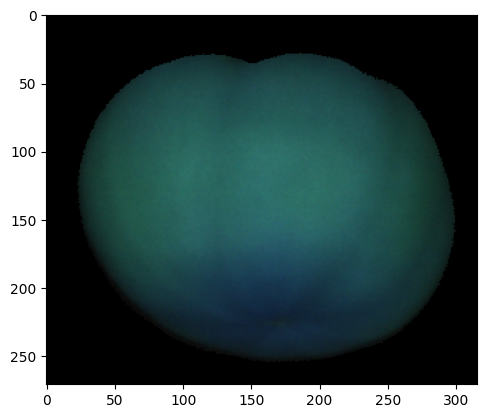

In [33]:
print(image.shape)
plt.imshow(image)

(271, 316)


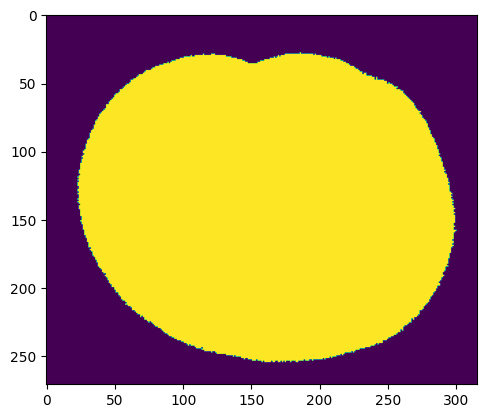

In [34]:
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY)
unique_values = np.unique(mask)
print(mask.shape)
plt.imshow(mask)

## TO IMPROVE PERFORMANCE
According to the paper, use a stride larger than 1. So the final img has smaller spatial dimensions (width, height).
Select only the pixels at each stride.

(136, 158)


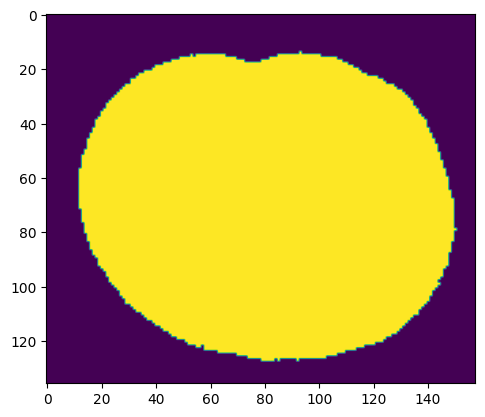

In [35]:
stride = 2  # This is the stride length
strided_image = mask[::stride, ::stride]

print(strided_image.shape)
plt.imshow(strided_image)

In [36]:
# AXES WITH STRIDED IMG
# Cov matrix calculatino function
squared_mask = mask ** 2
x_indices, y_indices = np.indices(mask.shape)
n = np.count_nonzero(mask)

# ELEMENT (0,0) OF MATRIX
sx = np.sum(x_indices * mask)
sxx = np.sum(x_indices * squared_mask)
cx = sx / n
cov_matrix_00 = (sxx / n) - cx ** 2

# ELEMENT (1,1) OF MATRIX
sy = np.sum(y_indices * mask)
syy = np.sum(y_indices * squared_mask)
cy = sy / n
cov_matrix_11 = (syy / n) - cy ** 2

# ELEMENT (0, 1) and (1, 0) OF MATRIX
sxy = np.sum(x_indices * y_indices * mask)
cov_matrix_10_01 = (sxy / n) - cx * cy

# COVARIANCE MATRIX
cov_matrix = [[cov_matrix_00, cov_matrix_10_01], [cov_matrix_10_01, cov_matrix_11]]
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_eigenvalues = np.sort(eigenvalues)[::-1]
major_eigenvalue = sorted_eigenvalues[0]
minor_eigenvalue = sorted_eigenvalues[-1]

a = 2 * (math.sqrt(abs(major_eigenvalue)))  # semi major axis of projected ellipse
b = 2 * (math.sqrt(abs(minor_eigenvalue)))  # semi minor axis of projected ellipse
print(a, b)

4806.617627659003 108913.9916964255


In [37]:
angle = np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0])
# center = np.array([cx, cy])  # center of the mask
mass_indices = np.where(mask == 1)
center_x = np.average(mass_indices[1])
center_y = np.average(mass_indices[0])
print(angle)

-0.7112521406186684


/Users/caqui/.pyenv/versions/3.9.7/envs/ai-ml/lib/python3.9/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/caqui/.pyenv/versions/3.9.7/envs/ai-ml/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[nan, nan] [ 0.75754509 -0.65278284] 4806.617627659003
[nan, nan] [0.65278284 0.75754509] 108913.9916964255
[-5.77589325e+06 -2.96556440e+09]


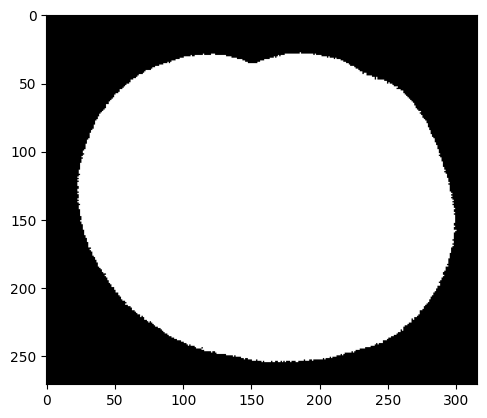

In [38]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
fig, ax = plt.subplots()
plt.imshow(mask, cmap='gray')  # assuming mask is your binary image

# Add the ellipse
# ellipse = Ellipse(center, a, b, angle=np.degrees(angle), edgecolor='r', fc='None', lw=2)
# ax.add_patch(ellipse)

# Add the eigenvectors (major and minor axes)
for i in range(len(eigenvalues)):
    # Start each vector at the center of the ellipse
    start = [center_x, center_y]

    # The direction and length of each vector are determined by the eigenvectors and eigenvalues
    direction = eigenvectors[:, i]
    length = 2 * np.sqrt(abs(eigenvalues[i]))  # 2*sqrt(eigenvalue) gives the axis length

    print(start, direction, length)

    # Draw the vector
    ax.quiver(*start, *direction, color=['r', 'b'][i], scale_units='xy', angles='xy')

print(eigenvalues)